Import necessary libraries and required modules for data preprocessing and model evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

Loading the dataset

In [2]:
census = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Data exploration

In [3]:
census.shape

(32560, 15)

In [4]:
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Data visualization

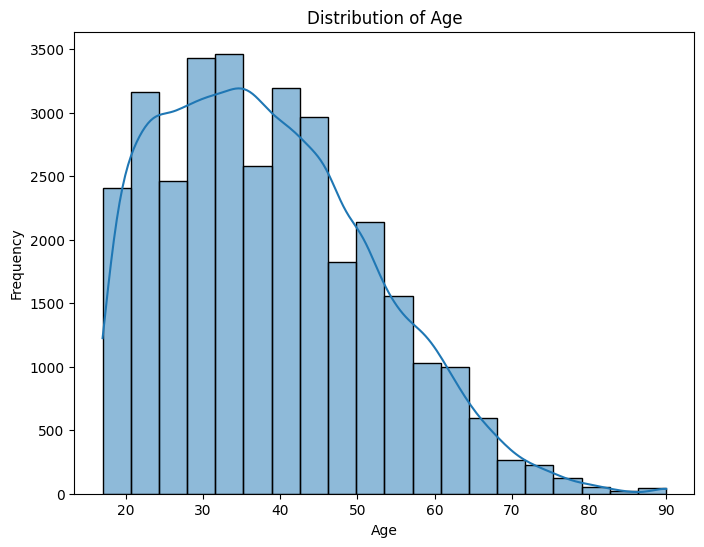

In [7]:
plt.figure(figsize=(8, 6))
sb.histplot(census['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

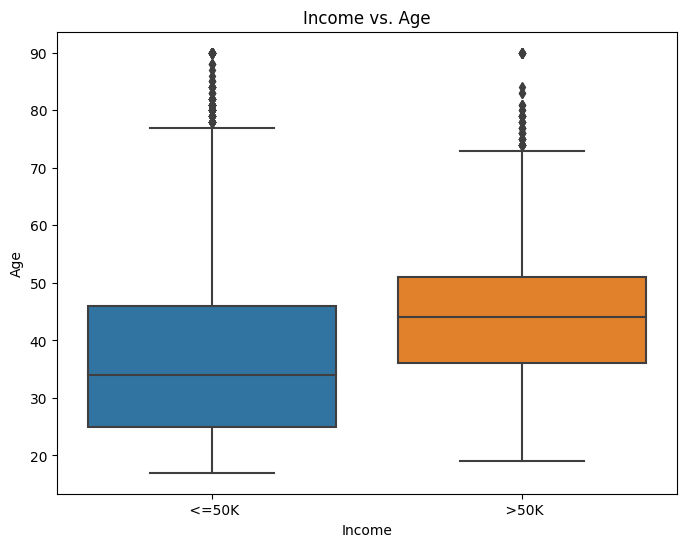

In [8]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='Income', y='Age', data=census)
plt.title('Income vs. Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

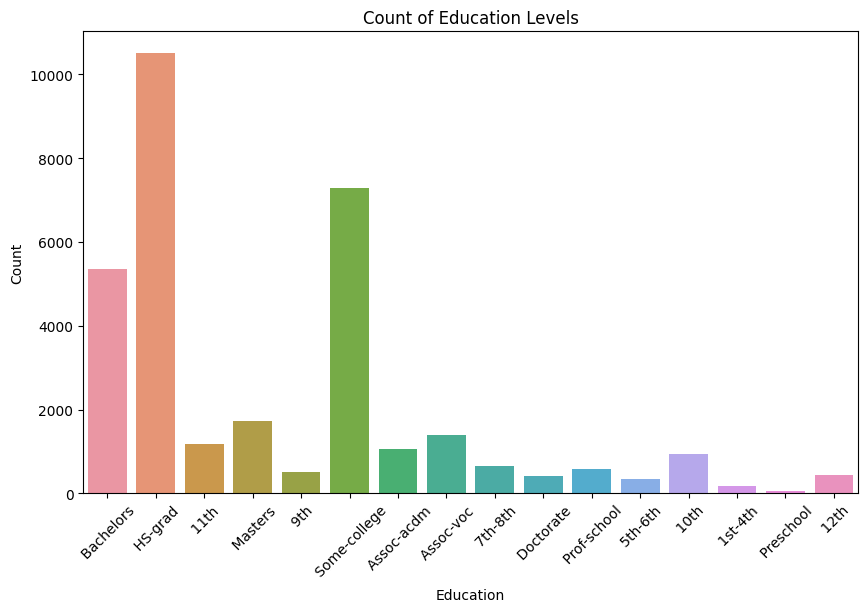

In [9]:
plt.figure(figsize=(10, 6))
sb.countplot(data=census, x='Education')
plt.xticks(rotation=45)
plt.title('Count of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

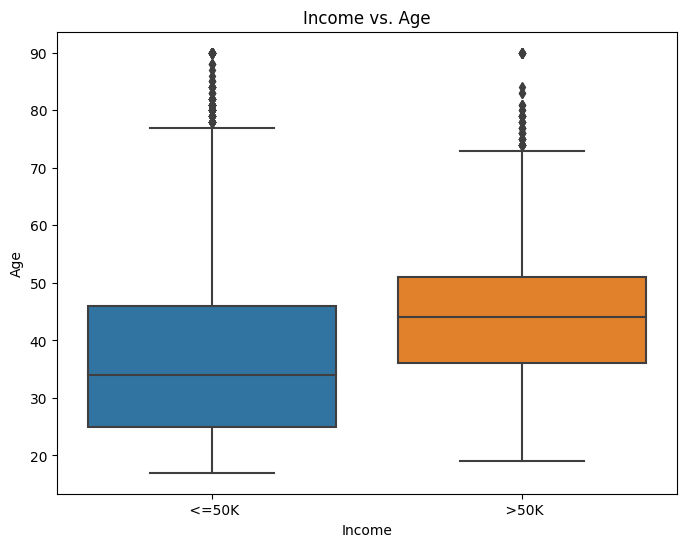

In [10]:
plt.figure(figsize=(8, 6))
sb.boxplot(x='Income', y='Age', data=census)
plt.title('Income vs. Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

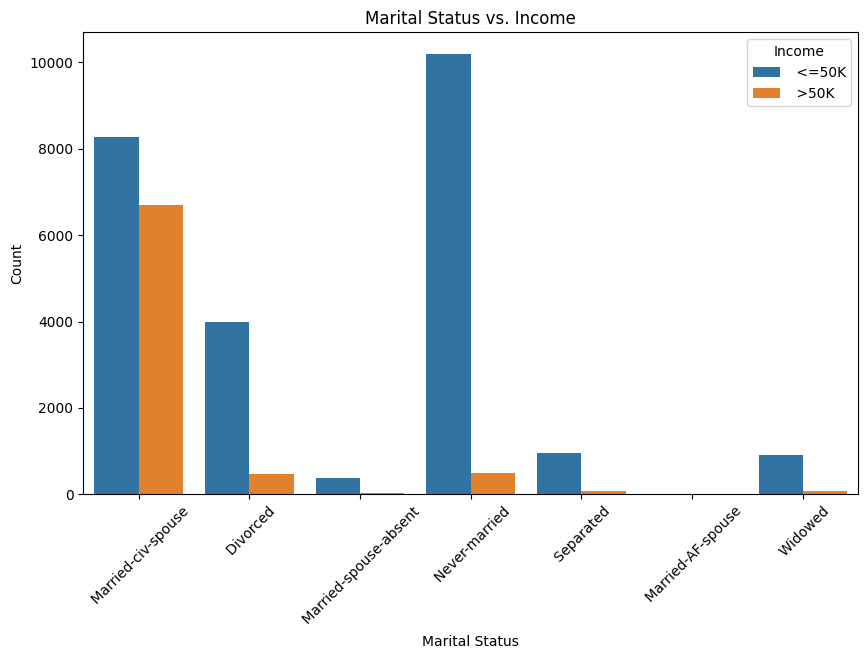

In [11]:
plt.figure(figsize=(10, 6))
sb.countplot(data=census, x='Marital_status', hue='Income')
plt.xticks(rotation=45)
plt.title('Marital Status vs. Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

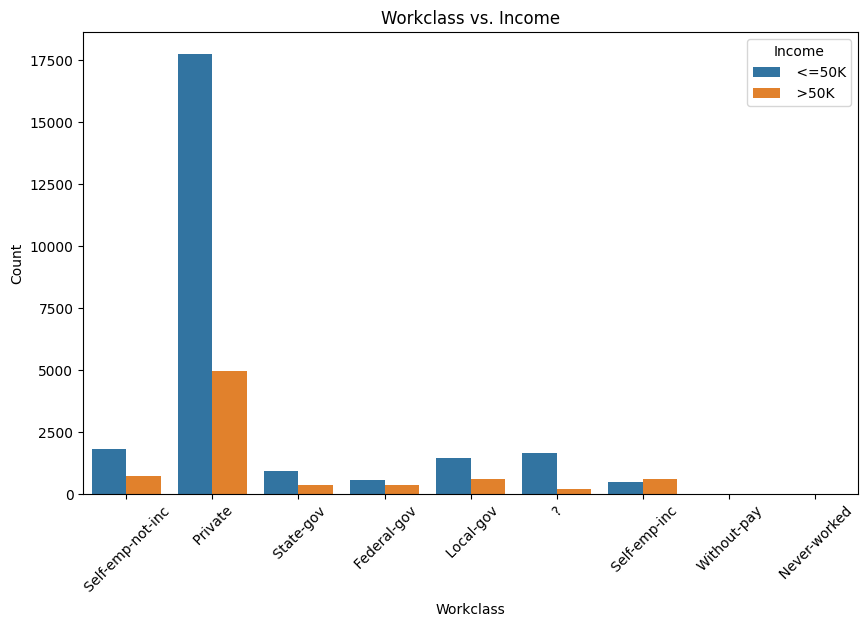

In [12]:
plt.figure(figsize=(10, 6))
sb.countplot(data=census, x='Workclass', hue='Income')
plt.xticks(rotation=45)
plt.title('Workclass vs. Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

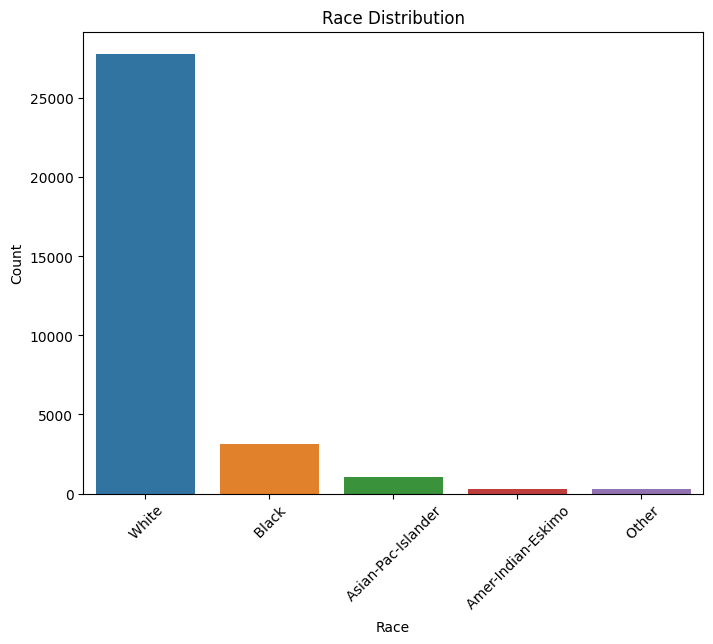

In [13]:
plt.figure(figsize=(8, 6))
sb.barplot(x=census['Race'].value_counts().index, y=census['Race'].value_counts())
plt.xticks(rotation=45)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

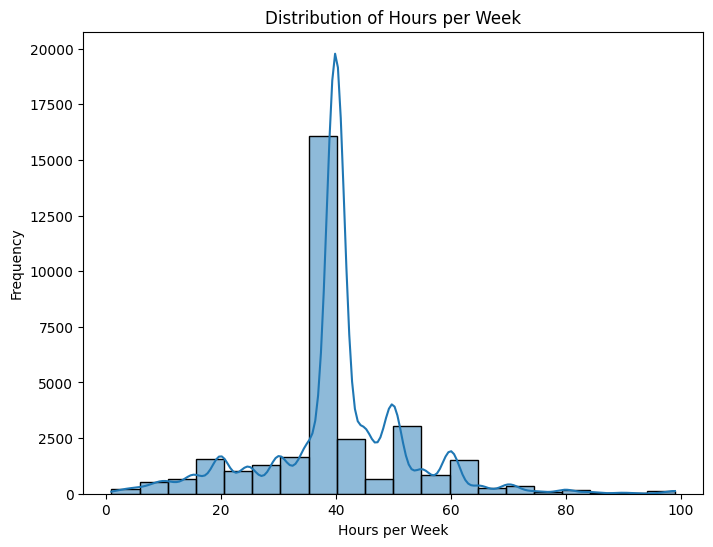

In [14]:
plt.figure(figsize=(8, 6))
sb.histplot(census['Hours_per_week'], bins=20, kde=True)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

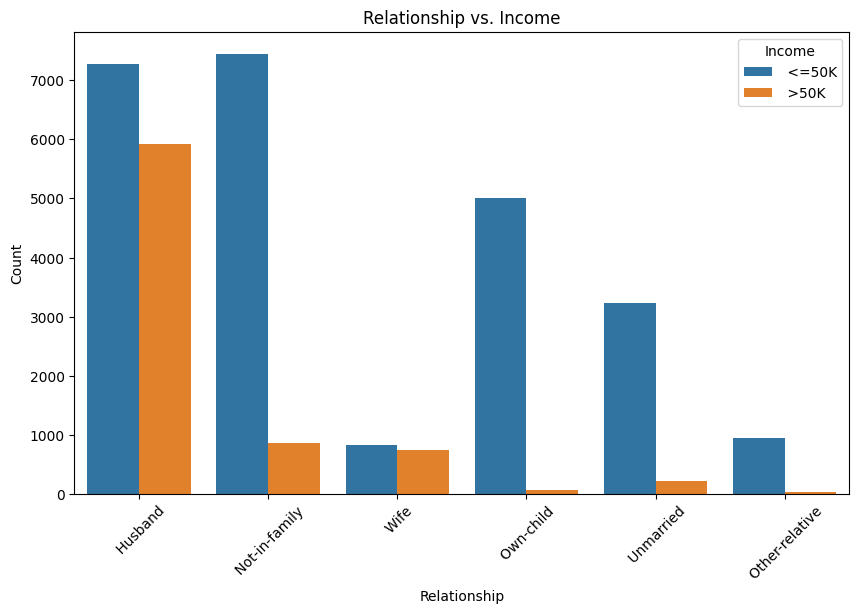

In [15]:
plt.figure(figsize=(10, 6))
sb.countplot(data=census, x='Relationship', hue='Income')
plt.xticks(rotation=45)
plt.title('Relationship vs. Income')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

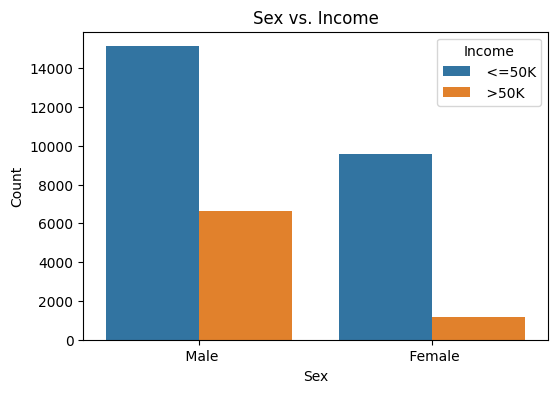

In [16]:
plt.figure(figsize=(6, 4))
sb.countplot(data=census, x='Sex', hue='Income')
plt.title('Sex vs. Income')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

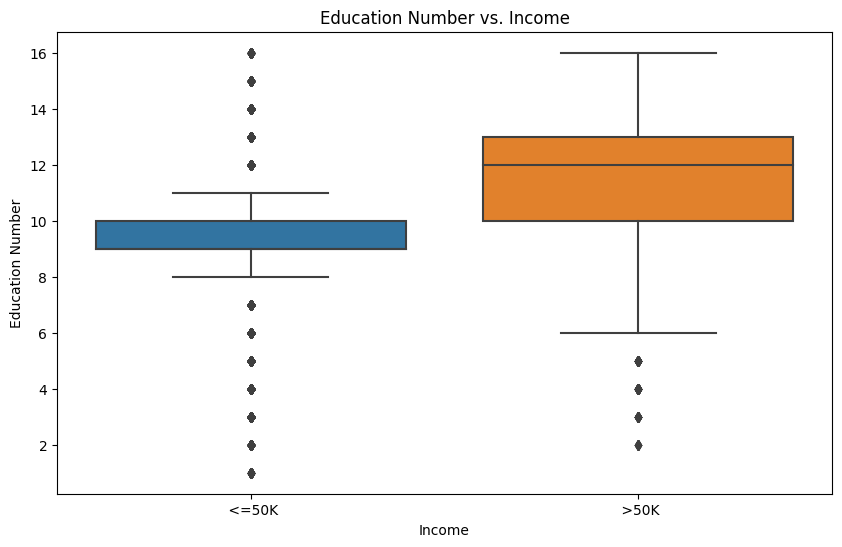

In [17]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='Income', y='Education_num', data=census)
plt.title('Education Number vs. Income')
plt.xlabel('Income')
plt.ylabel('Education Number')
plt.show()

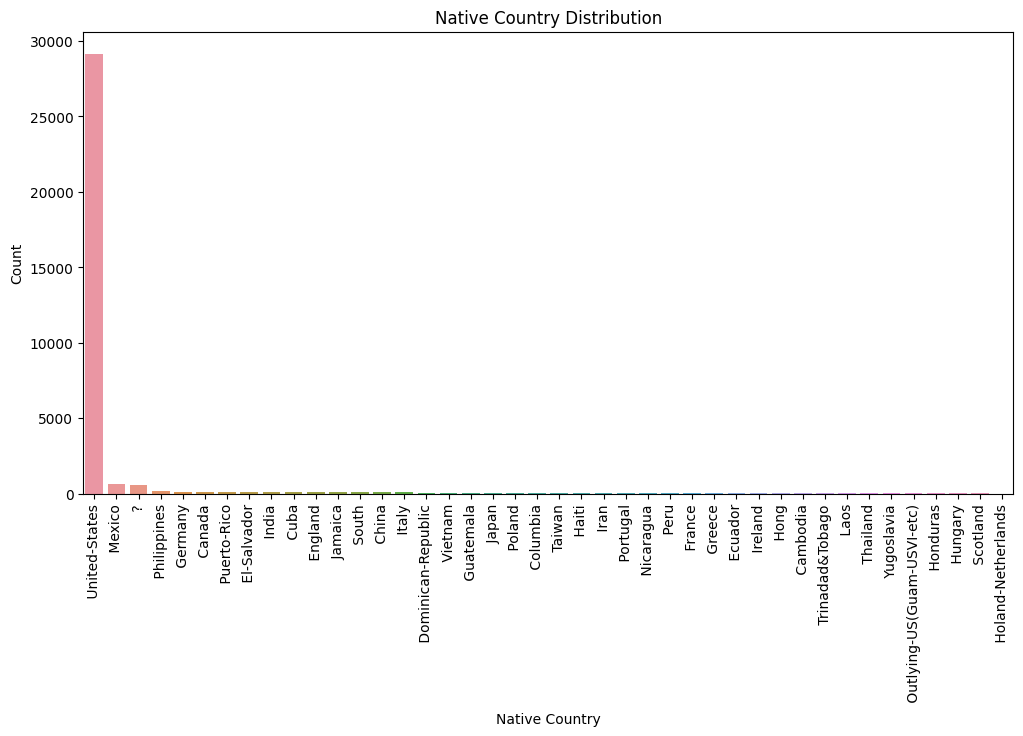

In [18]:
plt.figure(figsize=(12, 6))
sb.barplot(x=census['Native_country'].value_counts().index, y=census['Native_country'].value_counts())
plt.xticks(rotation=90)
plt.title('Native Country Distribution')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.show()

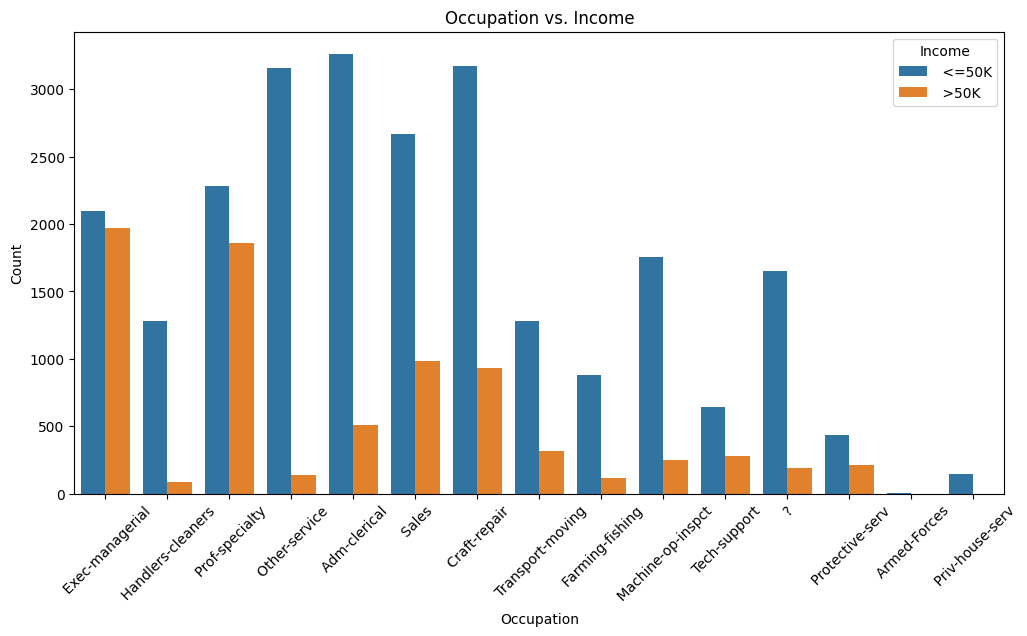

In [19]:
plt.figure(figsize=(12, 6))
sb.countplot(data=census, x='Occupation', hue='Income')
plt.xticks(rotation=45)
plt.title('Occupation vs. Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

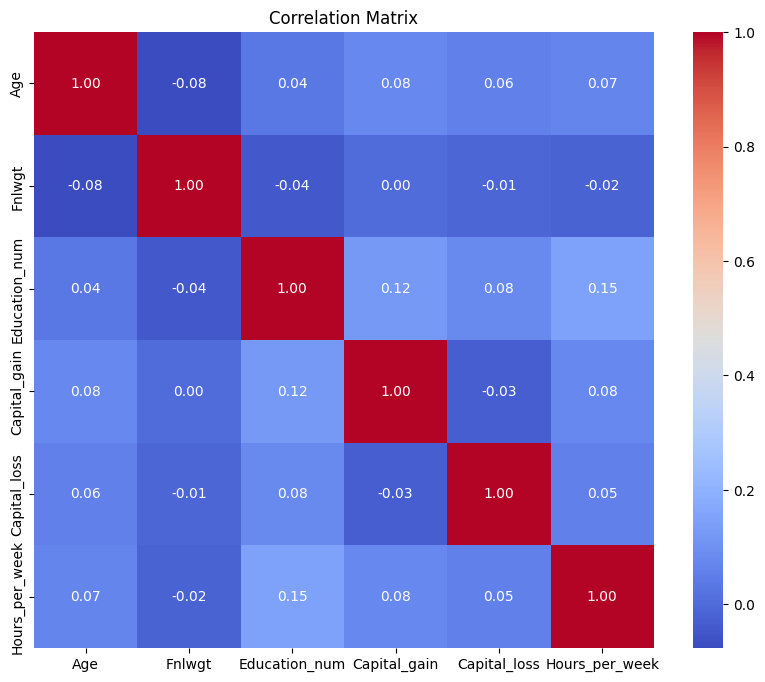

In [20]:
correlation_matrix = census.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

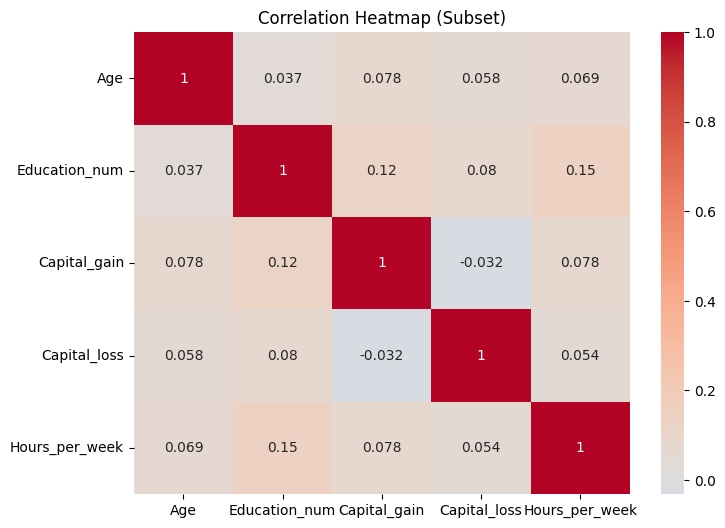

In [21]:
columns_ = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
subset_correlation_matrix = census[columns_].corr()

plt.figure(figsize=(8, 6))
sb.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Subset)')
plt.show()

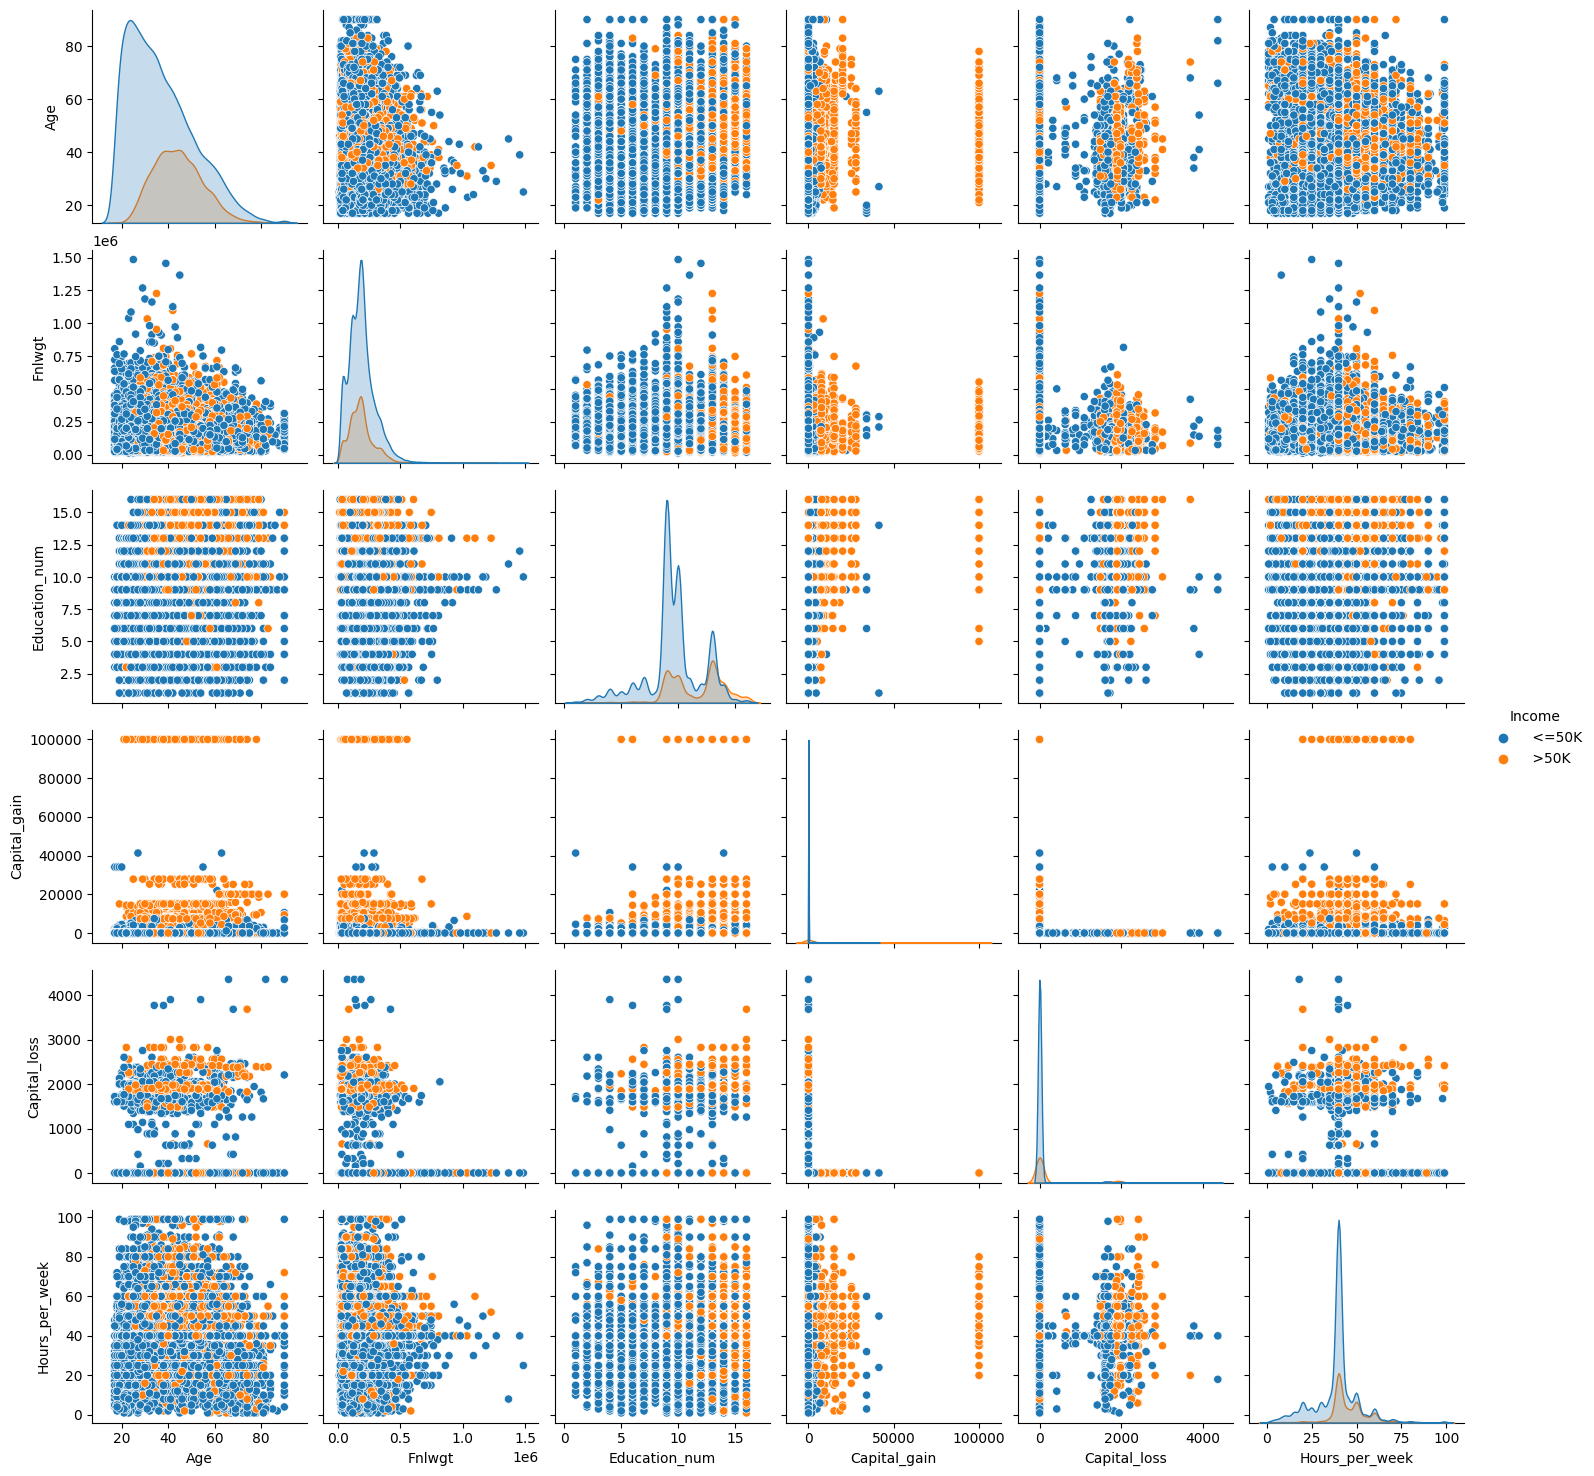

In [22]:
sb.pairplot(census, hue='Income', diag_kind='kde')
plt.show()

In [23]:
census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**Data Preprocessing and Feature Selection**

In [24]:
categorical_columns = ['Workclass', 'Income','Marital_status', 'Occupation','Relationship', 'Race', 'Sex', 'Native_country']
encoder = LabelEncoder()

for col in categorical_columns:
    census[col] = encoder.fit_transform(census[col])

In [25]:
#Dropping Education column
census = census.drop('Education', axis=1)

In [26]:
census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [27]:
columns_to_scale = ['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Occupation']

scaler = StandardScaler()
census[columns_to_scale] = scaler.fit_transform(census[columns_to_scale])

In [28]:
census.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.837097,1.463883,-1.008742,1.134779,-0.406183,-0.608434,-0.900177,0.393675,0.703087,-0.145914,-0.216663,-2.22212,0.291573,0
1,-0.042640,0.090121,0.245046,-0.420027,-1.734026,-0.135480,-0.277810,0.393675,0.703087,-0.145914,-0.216663,-0.03543,0.291573,0
2,1.057031,0.090121,0.425770,-1.197429,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,-0.145914,-0.216663,-0.03543,0.291573,0
3,-0.775755,0.090121,1.408146,1.134779,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-0.145914,-0.216663,-0.03543,-4.054157,0
4,-0.115952,0.090121,0.898170,1.523480,-0.406183,-0.608434,2.211658,0.393675,-1.422298,-0.145914,-0.216663,-0.03543,0.291573,0


**Split Data into Features (X) and Target (y):**

In [29]:
X = census.drop(columns=['Income'])
y = census['Income']

**Train-Test Split:**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
y_train.head()

24639    0
5514     0
19777    0
10781    0
32239    0
Name: Income, dtype: int64

**Model Building and Evaluation**

Model: Logistic Regression
Accuracy: 0.82
Precision: 0.70
Recall: 0.46
ROC AUC: 0.85
Cross-Validation Accuracy: 0.83 (±0.00)
Confusion Matrix:
[[4601  311]
 [ 859  741]]


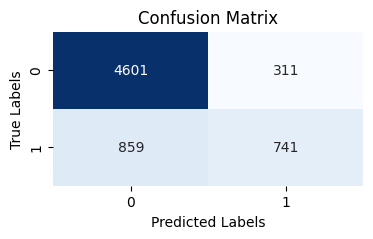



Model: Random Forest
Accuracy: 0.86
Precision: 0.75
Recall: 0.64
ROC AUC: 0.91
Cross-Validation Accuracy: 0.86 (±0.00)
Confusion Matrix:
[[4575  337]
 [ 577 1023]]


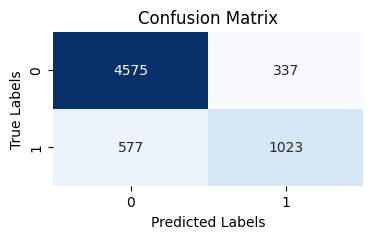



Model: Decision Tree
Accuracy: 0.81
Precision: 0.61
Recall: 0.62
ROC AUC: 0.74
Cross-Validation Accuracy: 0.81 (±0.01)
Confusion Matrix:
[[4268  644]
 [ 613  987]]


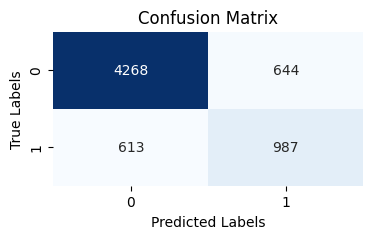



Model: Naive Bayes
Accuracy: 0.80
Precision: 0.72
Recall: 0.34
ROC AUC: 0.85
Cross-Validation Accuracy: 0.80 (±0.00)
Confusion Matrix:
[[4697  215]
 [1060  540]]


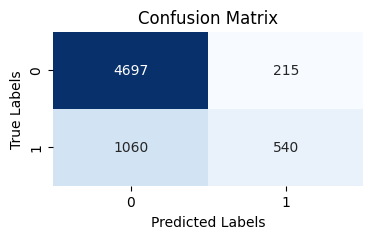

In [32]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

for model_name, model in models.items():
    print(f"Model: {model_name}")

    # Model Training
    model.fit(X_train, y_train)

    # Prediction using test data
    y_pred = model.predict(X_test)

    # Calculating the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)
    plt.figure(figsize=(4,2))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    print("\n")

Based on the metrics, the Random Forest model appears to be the best performing. Hence, we will be choosing it and performing Hyperparameter Tuning


#**Hyperparameter Tuning**

In [33]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

subset_X_train = X_train[:1000]
subset_y_train = y_train[:1000]

rf_model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(subset_X_train, subset_y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='accuracy', verbose=2)

In [34]:
best_params = random_search.best_params_

best_rf_model = RandomForestClassifier(**best_params, random_state=42)

best_rf_model.fit(X_train, y_train)

accuracy = best_rf_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Accuracy with Best Hyperparameters:", accuracy)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Accuracy with Best Hyperparameters: 0.8616400491400491


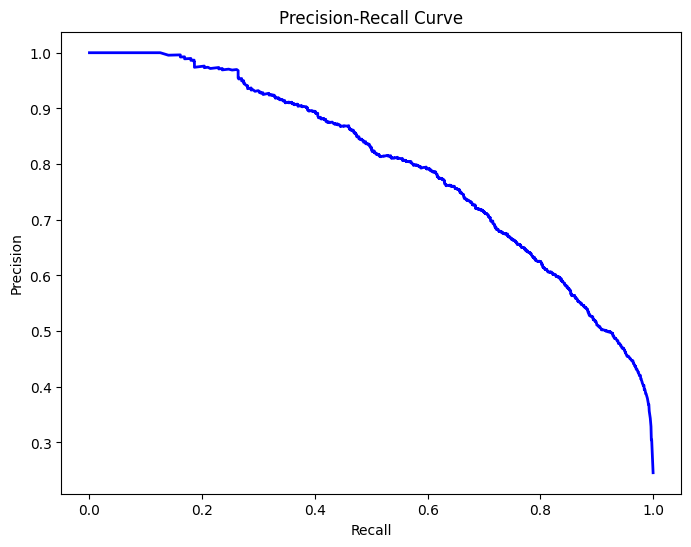

In [35]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

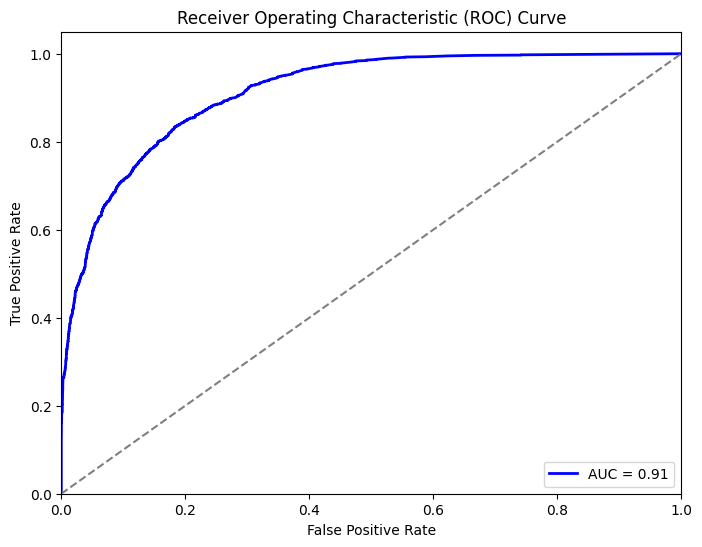

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Loading the model

In [37]:
import joblib

joblib.dump(best_rf_model, 'best_rf_model.joblib')

['best_rf_model.joblib']

Checking the model for predictions using sample data

In [38]:
loaded_model = joblib.load('best_rf_model.joblib')

sample_data = pd.DataFrame({
    'Age': [34],
    'Workclass': ['Private'],
    'Fnlwgt': [554374],
    'Education_num': [2],
    'Marital_status': ['Married-civ-spouse'],
    'Occupation': [2],
    'Relationship': ['Husband'],
    'Race': ['White'],
    'Sex': ['Female'],
    'Capital_gain': [0],
    'Capital_loss': [0],
    'Hours_per_week': [40],
    'Native_country': ['United-States'],

})

In [39]:
categorical_columns = ['Workclass', 'Marital_status', 'Occupation','Relationship', 'Race', 'Sex', 'Native_country']

encoder = LabelEncoder()

for col in categorical_columns:
    sample_data[col] = encoder.fit_transform(sample_data[col])

numerical_columns = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

scaler = StandardScaler()

sample_data[numerical_columns] = scaler.fit_transform(sample_data[numerical_columns])

In [40]:
predictions = loaded_model.predict(sample_data)

if predictions == 1:
  print("Predicted Income >50K")
else:
  print("Predicted Income <=50K")

Predicted Income <=50K
